In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
url = "housing.csv"
df = pd.read_csv(url)

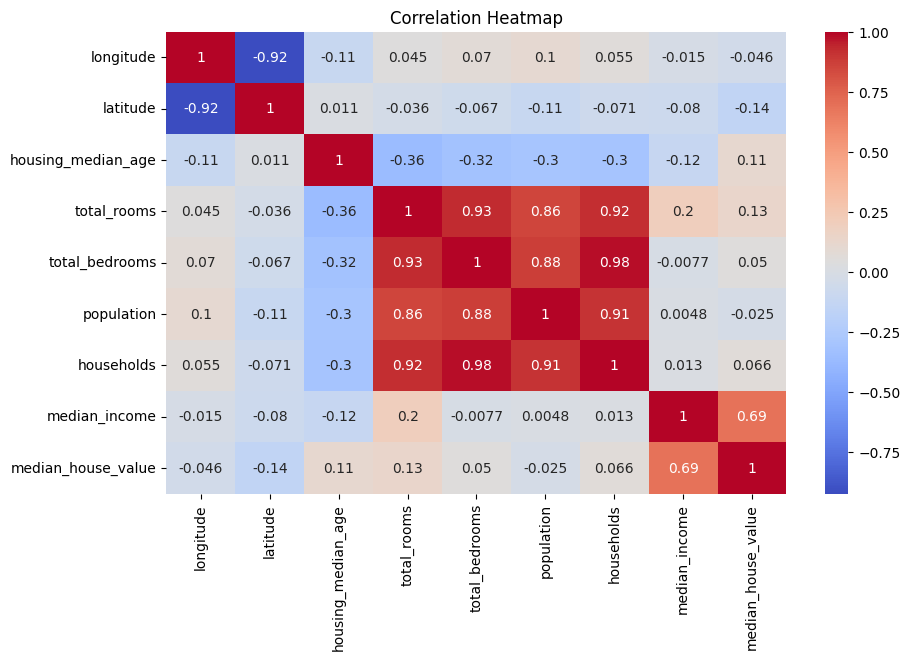

In [3]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

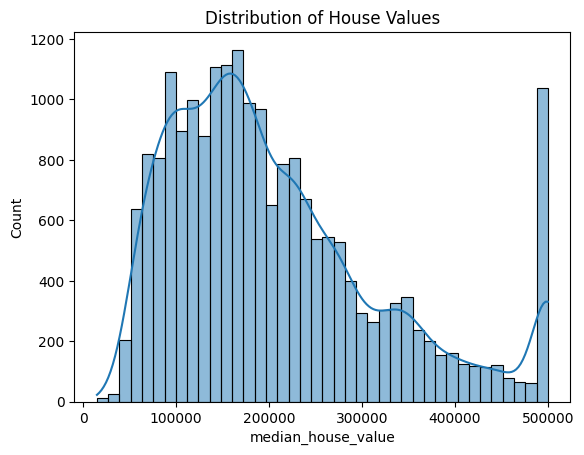

In [4]:
sns.histplot(df['median_house_value'], bins=40, kde=True)
plt.title("Distribution of House Values")
plt.show()

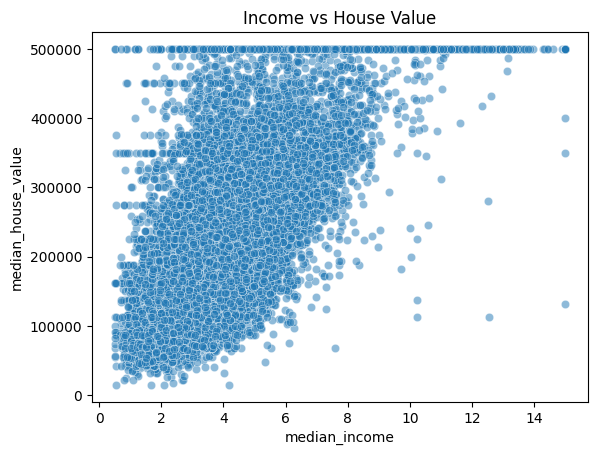

In [5]:
sns.scatterplot(data=df, x='median_income', y='median_house_value', alpha=0.5)
plt.title("Income vs House Value")
plt.show()

In [6]:
df.dropna(inplace=True)

In [8]:
feature_sets = {
    "Set_1": ["median_income", "housing_median_age"],
    "Set_2": ["median_income", "total_rooms", "households", "population"],
    "Set_3": ["longitude", "latitude", "median_income", "housing_median_age", "total_rooms", "population", "households"],
    "Set_4": list(df.columns.drop(["median_house_value", "ocean_proximity"]))
}
results = {}

In [9]:
for name, features in feature_sets.items():
    X = df[features]
    y = df["median_house_value"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        "features": features,
        "mse": mse,
        "r2": r2,
        "y_test": y_test,
        "y_pred": y_pred
    }

In [10]:
for key, val in results.items():
    print(f"\n🔹 {key}")
    print("Features:", val["features"])
    print("MSE:", val["mse"])
    print("R²:", val["r2"])


🔹 Set_1
Features: ['median_income', 'housing_median_age']
MSE: 6716742336.635747
R²: 0.5088370353766649

🔹 Set_2
Features: ['median_income', 'total_rooms', 'households', 'population']
MSE: 6361367864.586333
R²: 0.5348238561441069

🔹 Set_3
Features: ['longitude', 'latitude', 'median_income', 'housing_median_age', 'total_rooms', 'population', 'households']
MSE: 4969856093.992594
R²: 0.6365783990905043

🔹 Set_4
Features: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
MSE: 4921881237.628168
R²: 0.640086568899372


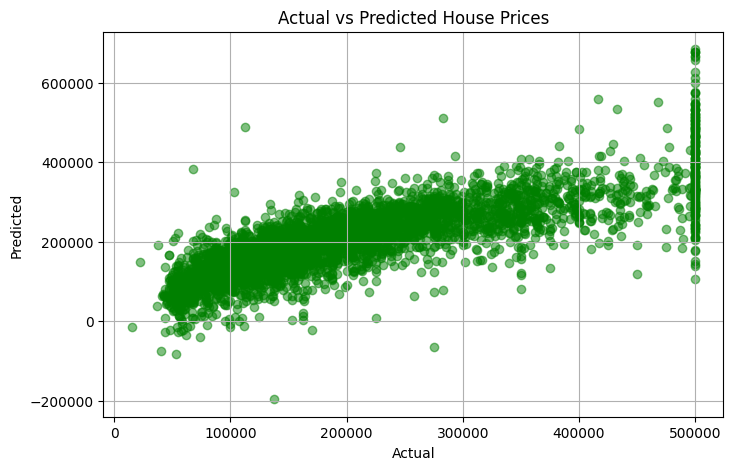

In [11]:
best_model = max(results.items(), key=lambda x: x[1]['r2'])[1]

plt.figure(figsize=(8,5))
plt.scatter(best_model['y_test'], best_model['y_pred'], alpha=0.5, color='green')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()

### 📝 Summary of House Price Prediction Project

We used the California Housing dataset to train multiple linear regression models with different sets of features. The goal was to predict the `median_house_value`.

The best performing model achieved an **R² score of around 0.64** using features like:

- `median_income`
- `housing_median_age`
- `total_rooms`
- `latitude`
- `longitude`
- `population`

#### 💡 What could improve the model:
- Using a more complex model
- normalization
